# Исследование сервиса аренды самокатов GoFast

# Цель исследования:
Проанализировать данные и проверть некоторые гипотезы, которые могут помочь бизнесу вырасти.

# Описание данных:
1. В файле users_go.csv содержится информация о пользователях, их поездках и подписках.

user_id - уникальный идентификатор пользователя

name - имя пользователя

age - возраст

city - город

subscription_type - тип подписки (free, ultra)

2. В файле rides_go.csv содержится информация о поездках

user_id - уникальный идентификатор пользователя

distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)

duration - расстояние, которое пользователь проехал в текущей сессии (в метрах)
продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»

date - дата совершения поездки

3. В файле subscriptions_go.csv содержится информация о подписках

subscription_type - тип подписки

minute_price - стоимость одной минуты поездки по данной подписке

start_ride_price - стоимость начала поездки

subscription_fee - стоимость ежемесячного платежа

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
•	без подписки 
o	абонентская плата отсутствует;
o	стоимость одной минуты поездки — 88 рублей;
o	стоимость старта (начала поездки) — 5050 рублей;
•	с подпиской Ultra 
o	абонентская плата — 199199 рублей в месяц;
o	стоимость одной минуты поездки — 66 рублей;
o	стоимость старта — бесплатно.

# План работы:


Шаг 1. Загрузка данных

Шаг 2. Предобработка данных

Шаг 3. Исследовательский анализ данных

Шаг 4. Объединение данных

Шаг 5. Подсчёт выручки

Шаг 6. Проверка гипотез


Импотрируем необходимые библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import numpy as np

## Шаг 1. Загрузка и предобработка данных

In [2]:
users_go = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
rides_go = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')
subscriptions_go = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

In [3]:
users_go.head(5)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
users_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
rides_go.head(5)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [6]:
rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [7]:
subscriptions_go.head(5)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [8]:
subscriptions_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


Произвели загрузку данных, проверили корректность вывода изучили типы каждого набора данных.
Пропусков в данных нет. Все типы данных указаны верно, кроме одного.
В таблице rides_go[date] тип данных не верный. В дальнейшем, необходимо изменить тип object на datetime64. 

## Шаг 2. Предобработка данных

### Приведем столбец date к типу даты Pandas (datetime):

In [9]:
rides_go['date'] = pd.to_datetime(rides_go['date'], format = '%Y-%m-%d')

In [10]:
rides_go.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [11]:
rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


### Создим новый столбец с номером месяца на основе столбца date.

In [12]:
rides_go['month'] = pd.DatetimeIndex(rides_go['date']).month
rides_go['month'].unique()

array([ 1,  4,  8, 10, 11, 12,  3,  6,  7,  2,  5,  9])

In [13]:
#посмотрим, за какой период (года) представлены данные
print(pd.DatetimeIndex(rides_go['date']).year.unique())

Index([2021], dtype='int32', name='date')


Данные предсталены за все 12 месяцев 2021 года.

### Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.

Выведем на экран количество пропусков в каждой колонке:

In [14]:
users_go.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [15]:
rides_go.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

Пропусков не обнаружено.
Осуществим поиск полных явных дубликатов:

In [16]:
users_go.duplicated().sum()

31

In [17]:
#Нашли 31 дубликат. Удалим эти строки.
users_go = users_go.drop_duplicates()
#Проверяем:
users_go.duplicated().sum()
#Готово. Теперь в таблице users_go больше нет дубликатов данных.

0

In [18]:
rides_go.duplicated().sum()
#Здесь все хорошо.

0

In [19]:
#поищем дубликаты по столбцам ['user_id', 'name']
users_go.duplicated(['user_id', 'name']).sum()

0

Дубликатов по столбцам ['user_id', 'name'] не обнаружено.

In [20]:
#проверим столбец длительности на наличие аномалий
rides_go.describe()

,user_id,distance,duration,date,month
count,18068.000000,18068.000000,18068.000000,18068,18068.000000
mean,842.869936,3070.659976,17.805011,2021-06-30 19:47:21.266327296,6.486772
min,1.000000,0.855683,0.500000,2021-01-01 00:00:00,1.000000
25%,487.000000,2543.226360,13.597563,2021-04-02 00:00:00,4.000000
50%,889.000000,3133.609994,17.678395,2021-06-30 00:00:00,6.000000
75%,1213.250000,3776.222735,21.724800,2021-09-28 00:00:00,9.000000
max,1534.000000,7211.007745,40.823963,2021-12-30 00:00:00,12.000000
std,434.734317,1116.831209,6.091051,NaN,3.437410


Замечаем, что минимальная длительность поездки 0.5 минуты - будем считать, что это слишком мало, удалим значения, которые меньше одной целой минуты:

In [21]:
#удаляем аномальные значения
rides_go.drop(index=rides_go.query('duration < 1').index,inplace=True)

In [22]:
#проверяем:
rides_go.describe()

,user_id,distance,duration,date,month
count,17973.000000,17973.000000,17973.000000,17973,17973.000000
mean,841.551995,3059.863833,17.896480,2021-06-30 19:41:36.745117696,6.486786
min,1.000000,0.855683,2.035632,2021-01-01 00:00:00,1.000000
25%,484.000000,2538.839628,13.670439,2021-04-02 00:00:00,4.000000
50%,887.000000,3129.029255,17.714122,2021-06-30 00:00:00,6.000000
75%,1213.000000,3762.636244,21.747016,2021-09-28 00:00:00,9.000000
max,1534.000000,7066.003772,40.823963,2021-12-30 00:00:00,12.000000
std,435.144929,1108.814612,5.975424,NaN,3.436024


Вывод: В шаге "Предобработка данных" мы выполнили следующие действия:

1) Преобразовали тип данных столбца rides_go['date'] (object -> datetime).
2) Создали столбец rides_go['month'], который содержит номер месяца из rides_go['date'].
3) Проверили наличие пропусков в имеющихся данных. Пропуски не были обнаружены. Были удалены строки с полными дубликатами данных и аномальные значения в столбце rides_go['duration'].

Теперь данные готовы для работы над исследовательским анализом данных.

## Шаг 3. Исследовательский анализ данных

Опишем и визуализируем общую информацию о пользователях и поездках:

### Частота встречаемости городов

In [23]:
#Создаем сводную таблицу для последующей визуализации
pivot_table_city = users_go.pivot_table(index = 'city',values = 'age', aggfunc=['count'])
pivot_table_city.columns = ['count']
pivot_table_city = pivot_table_city.sort_values('count', ascending = True)

In [24]:
pivot_table_city

,count
city,
Москва,168
Тюмень,180
Омск,183
Сочи,189
Краснодар,193
Ростов-на-Дону,198
Екатеринбург,204
Пятигорск,219


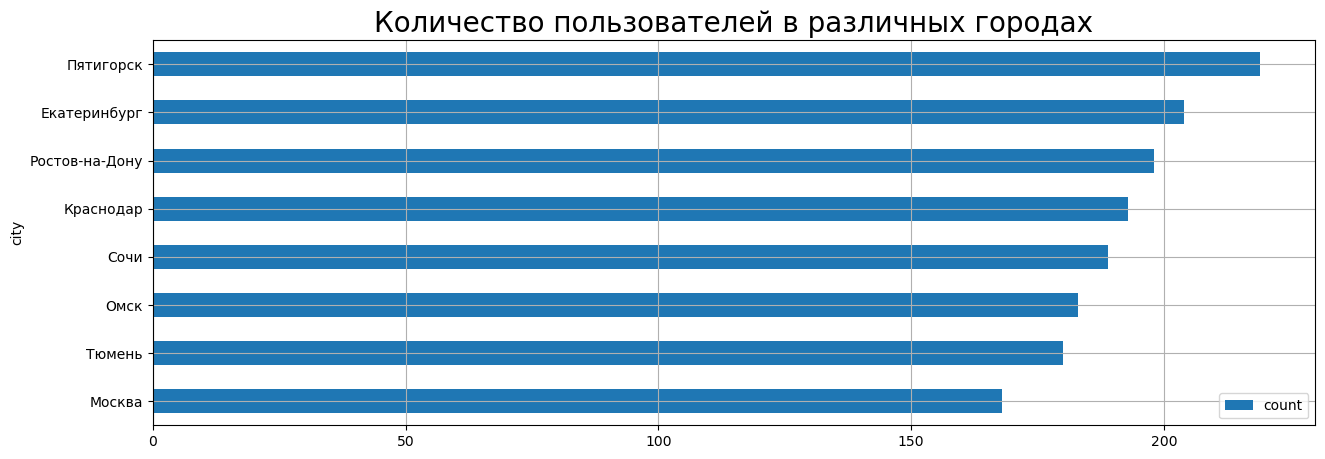

In [25]:
pivot_table_city.plot(kind='barh', grid=True, figsize=(15, 5));
plt.title('Количество пользователей в различных городах',fontsize= 20);

В исследуемых данных мы обнаружили, что наибольшее число клиентов компании "Go fast" живут в Пятигорске. Меньше всего пользователей находится в Москве.

### Соотношение пользователей с подпиской и без подписки

In [26]:
plt_subscription_type = users_go['subscription_type'].value_counts()
plt_subscription_type

subscription_type
free     835
ultra    699
Name: count, dtype: int64

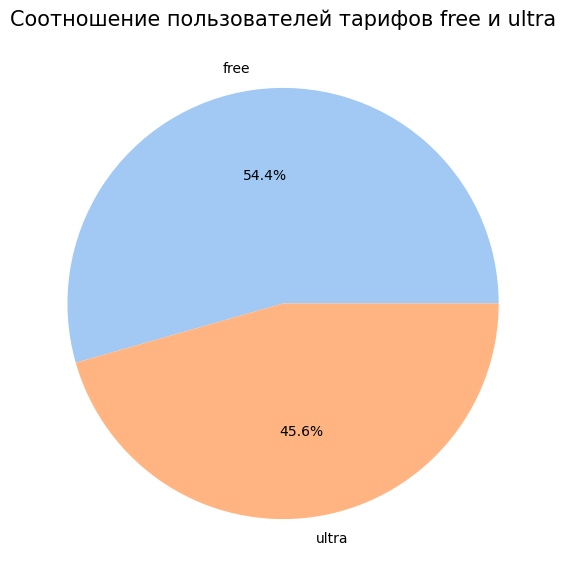

In [28]:

colors = sns.color_palette('pastel')[ 0:2 ]
plt.rcParams['figure.figsize'] = [7, 7]
plt.pie(plt_subscription_type, labels = ['free', 'ultra'], colors = colors, autopct='%.1f%%')
plt.title('Соотношение пользователей тарифов free и ultra', loc= 'center', fontsize= 15,);
plt.show()

In [29]:
users_go['subscription_type'].describe()

count     1534
unique       2
top       free
freq       835
Name: subscription_type, dtype: object

Пользователей сервиса без подписки (free) приблизительно на 135 больше, чем пользователей, которые оформили подписку. 

### Возраст пользователей

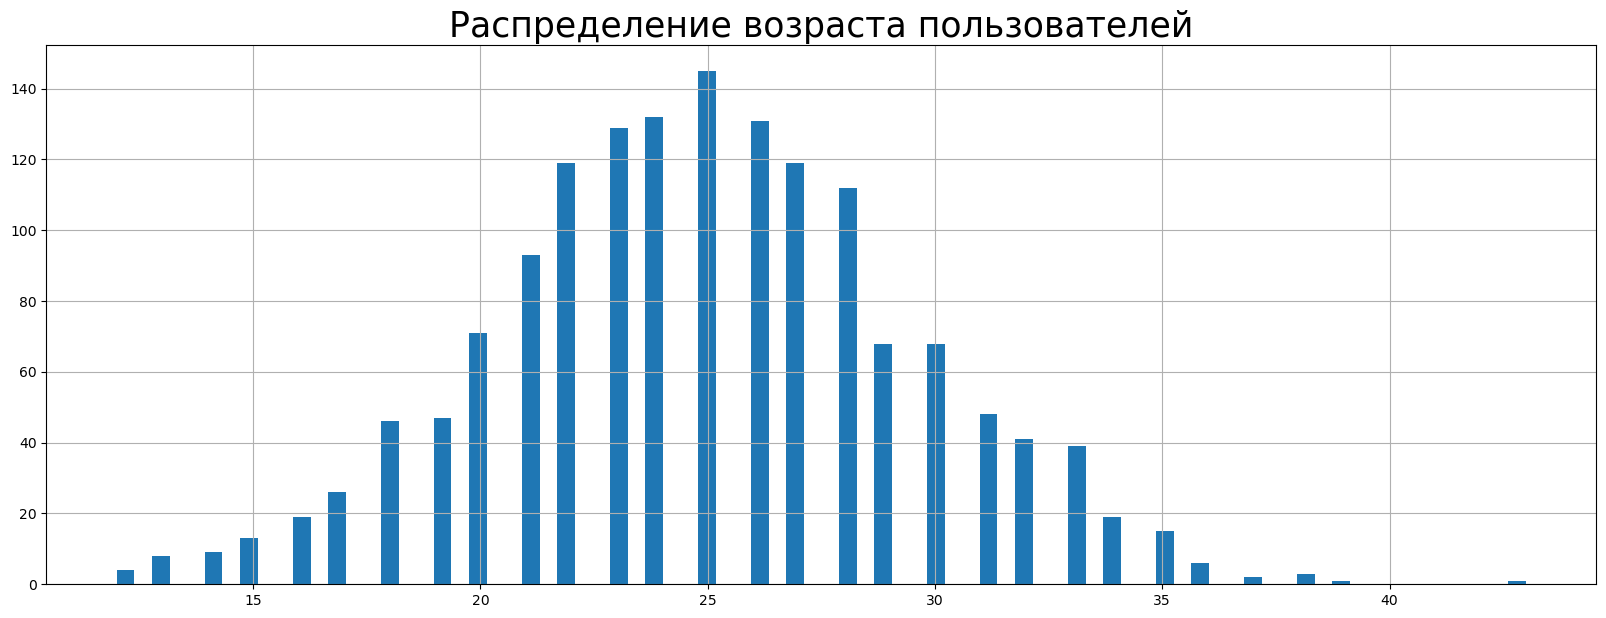

In [30]:
users_go['age'].hist(bins = 80, figsize=(20, 7));
plt.title('Распределение возраста пользователей', fontsize= 25);

In [31]:
users_go['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

График возраста клиентов напоминает нормальное распределение со средним, равным 25.

### Расстояние, которое пользователь преодолел за одну поездку

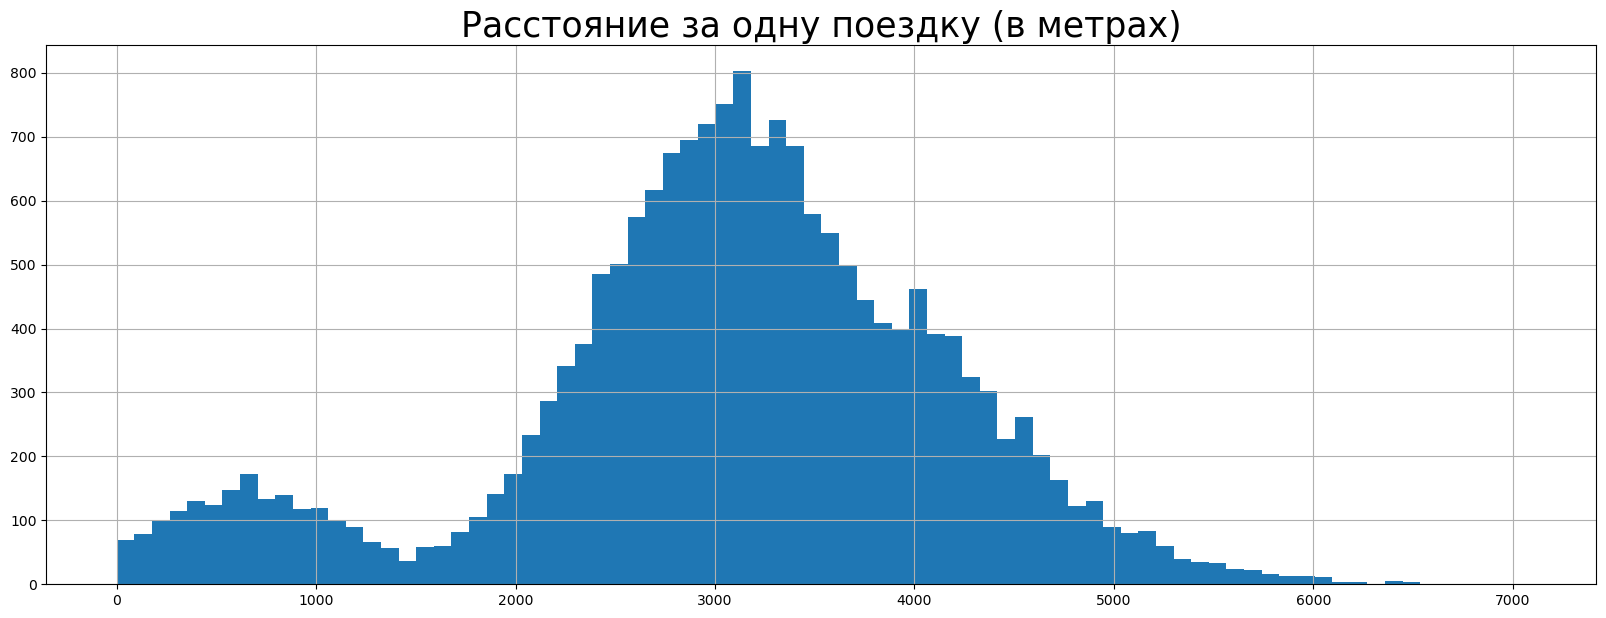

In [32]:
rides_go['distance'].hist(bins = 80, figsize=(20, 7));
plt.title('Расстояние за одну поездку (в метрах)', fontsize= 25);

In [33]:
rides_go['distance'].describe()

count    17973.000000
mean      3059.863833
std       1108.814612
min          0.855683
25%       2538.839628
50%       3129.029255
75%       3762.636244
max       7066.003772
Name: distance, dtype: float64

Наблюдаем большой хвост в данных от 5 до 7,2 км. Однако 
это незначительно сказывается на разнице между средней и медианой.
Также можем заметить на гистограмме два пика распределения данных: около 600 м и около 3100 м.
Второй пик длительности поездок может быть объяснен низким зарядом аккумулятора самоката. Тогда пользователь может проехать до следующего пункта стоянки, чтобы сменить свое транспортное средство на более "жизнеспособное".
В среднем, пользователи преодолевают на самокате расстояние в 3060 м.

###  Продолжительность поездок

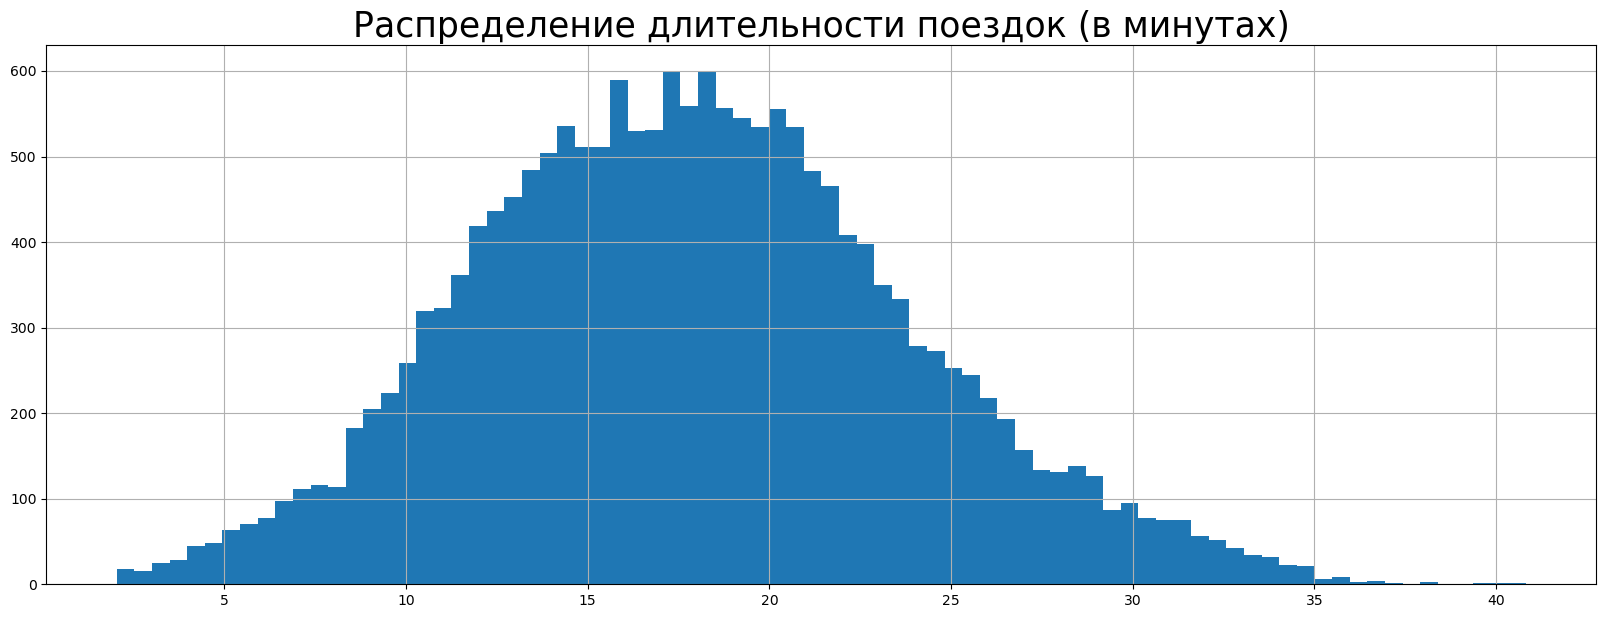

In [34]:
rides_go['duration'].hist(bins = 80, figsize=(20, 7));
plt.title('Распределение длительности поездок (в минутах)', fontsize= 25);

In [35]:
rides_go['duration'].describe()

count    17973.000000
mean        17.896480
std          5.975424
min          2.035632
25%         13.670439
50%         17.714122
75%         21.747016
max         40.823963
Name: duration, dtype: float64

Значения продолжительности поездок распределены нормально.
В среднем, одна поездка на самокате длится около 18 минут.

Шаг 3 : Выводы

Наиболее часто встречаются пользователи из Пятигорска, наиболее редко – из Москвы.
Подписка, очевидно, пользуется популярностью у клиентов, ее предпочитают 835 человек из 1534.
Половина всех клиентов относится к  возрастной категории от 22 до 28 лет, с модой в 25 лет.
Основная масса пользователей предпочитает пользоваться самокатами в том случае, если им предстоит преодолеть путь протяженностью от 2,5 - 3,8 км и длительностью  от 13 до 21 минуты.

## Шаг 4. Объединение данных

### Объединим данные о пользователях (users_go), поездках(rides_go) и подписках(subscriptions_go) в один датафрейм.

In [36]:
#для этого воспользуемся методом merge()
data = users_go.merge(rides_go, on='user_id', how='right')
data = data.merge(subscriptions_go, on='subscription_type', how='left')

In [37]:
#Проверяем корректность объединения:
data.head(5)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


После объединения трех датафреймов необходимо понять корректно ли мы выполнили данную задачу?
Сравним количество строк до и после объединения:

In [38]:
data.shape

(17973, 12)

In [39]:
users_go.shape

(1534, 5)

In [40]:
rides_go.shape

(17973, 5)

In [41]:
subscriptions_go.shape

(2, 4)

Количество строк в датафрейме data совпадает с количеством строк в датафрейме rides_go, по которому производилось объединение. Тут всё верно.

Сравним количество уникальных пользователей в исходных и в объединенном датафрейме:

In [42]:
users_go['user_id'].unique()

array([   1,    2,    3, ..., 1532, 1533, 1534], dtype=int64)

In [43]:
rides_go['user_id'].unique()

array([   1,    2,    3, ..., 1532, 1533, 1534], dtype=int64)

In [44]:
data['user_id'].unique()

array([   1,    2,    3, ..., 1532, 1533, 1534], dtype=int64)

В таблицах до и после объединения количество уникальных пользователей не изменилось. Объединение было произведено корректно.

Объединение таблиц было выполнено корректно: количество строк до и после объединения не изменилось и осталось равным 17973.

Количество уникальных пользователей в датафреймах до объединения(users_go, rides_go) равно количеству уникальных пользователей в датафрейме после объединения (data).

### Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1:

In [45]:
#c данными о пользователях без подписки
free_type = data.query('subscription_type == "free"')

In [46]:
free_type.head(5)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


In [47]:
#с данными о пользователях с подпиской
ultra_type = data.query('subscription_type == "ultra"')

In [48]:
ultra_type.head(5)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


### Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.


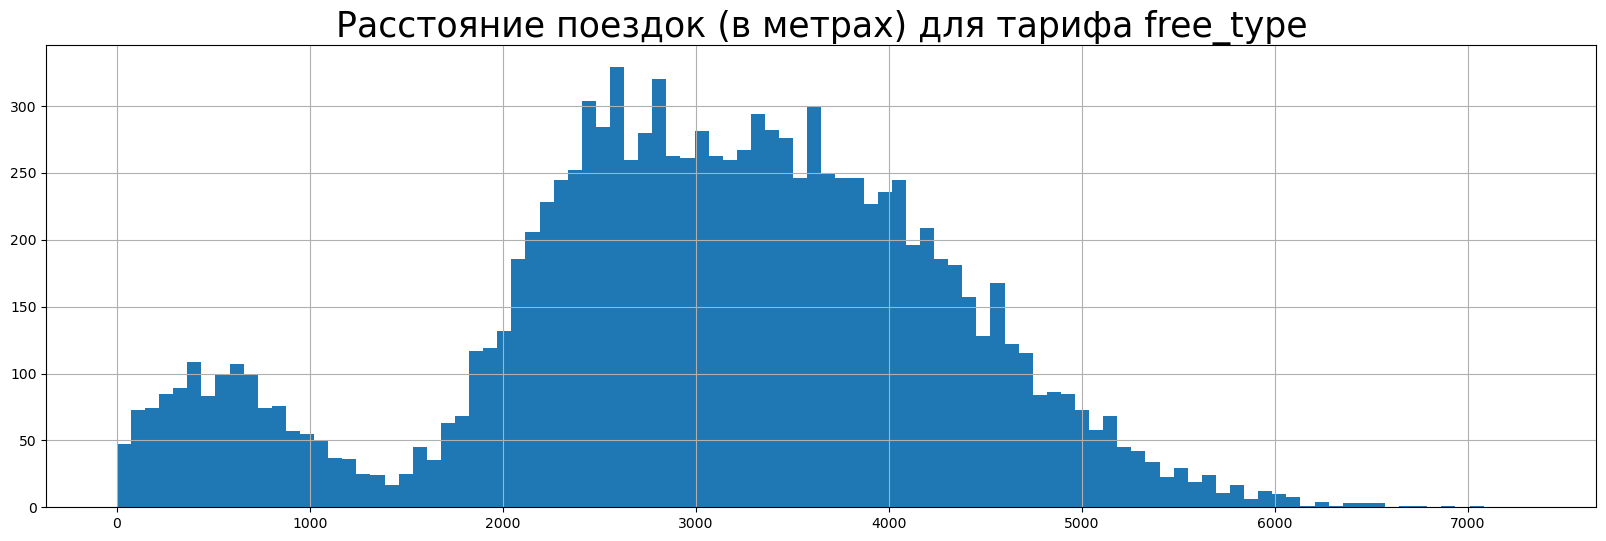

In [49]:
#distance free_type
free_type['distance'].hist(bins = 100, figsize = (20, 6), range = (0,7300));
plt.title('Расстояние поездок (в метрах) для тарифа free_type', fontsize= 25);

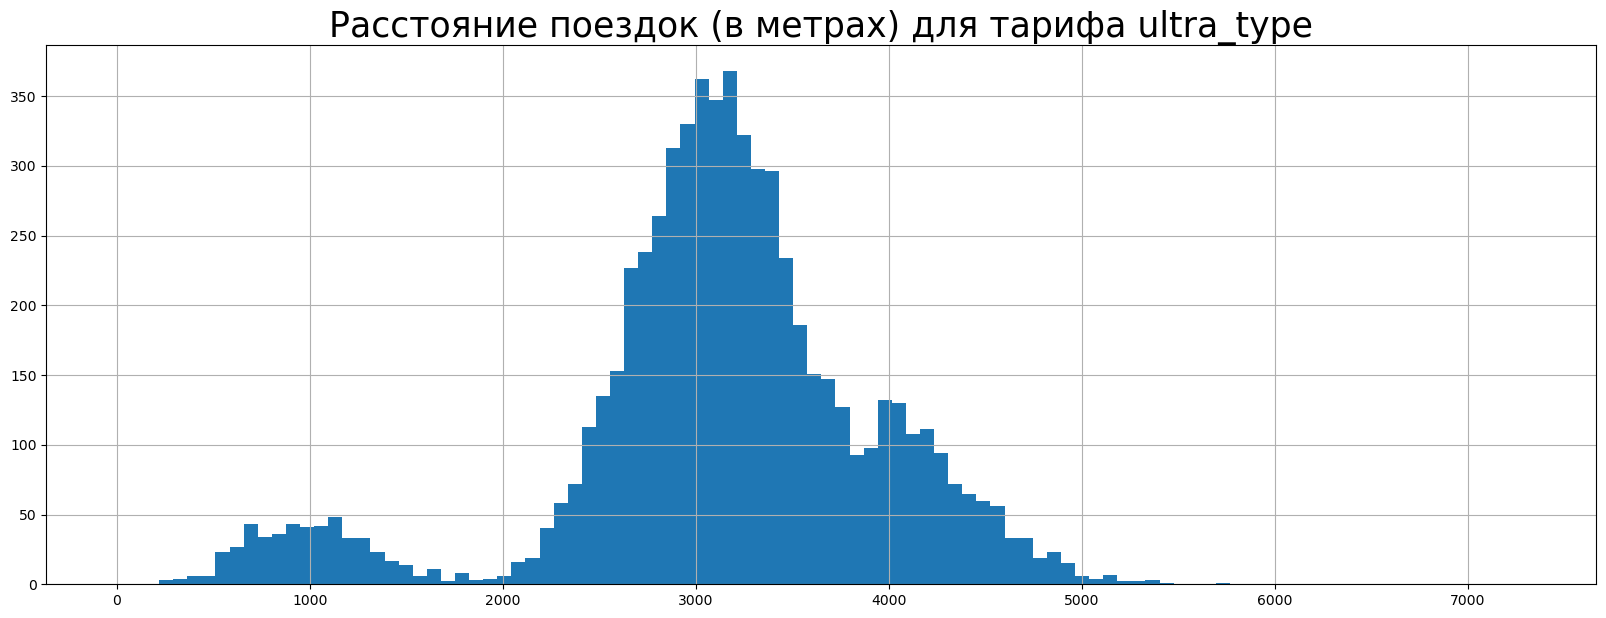

In [50]:
#distance ultra_type
ultra_type['distance'].hist(bins = 100, figsize = (20, 7), range = (0,7300));
plt.title('Расстояние поездок (в метрах) для тарифа ultra_type', fontsize= 25);

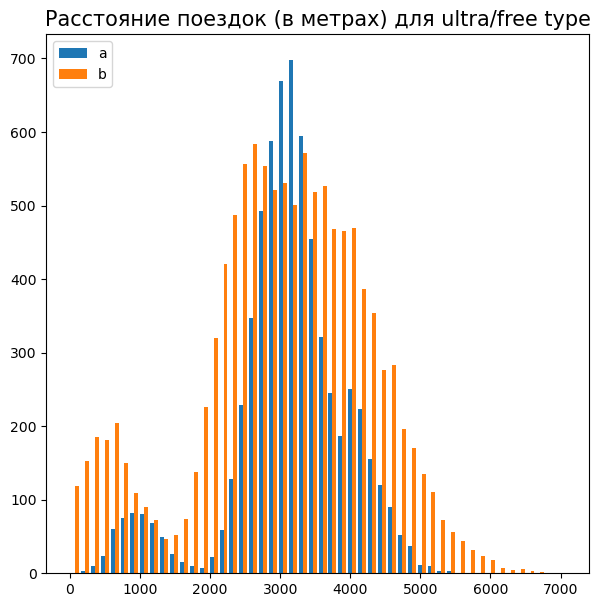

In [51]:
#Совместим графики распределений расстояния поездок:
a = ultra_type['distance']
b = free_type['distance']

plt.hist([a, b], bins = 50, label=['a', 'b'])
plt.legend(loc='upper left')
plt.title('Расстояние поездок (в метрах) для ultra/free type', fontsize= 15)
plt.show()


In [52]:
free_type['distance'].describe()

count    11473.000000
mean      3028.374239
std       1235.541051
min          0.855683
25%       2360.878149
50%       3102.083025
75%       3883.979311
max       7066.003772
Name: distance, dtype: float64

In [53]:
ultra_type['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

Наблюдаем, что оба грфика бимодальные.
График free_type более "растянутый", разброс данных здесь гораздо больше, в сравнении с графиком ultra_type. Мы можем убедиться в этом, сравнив стандартные отклонения двух графиков: std(free_type)=1246.2 > std(ultra_type)=836.9

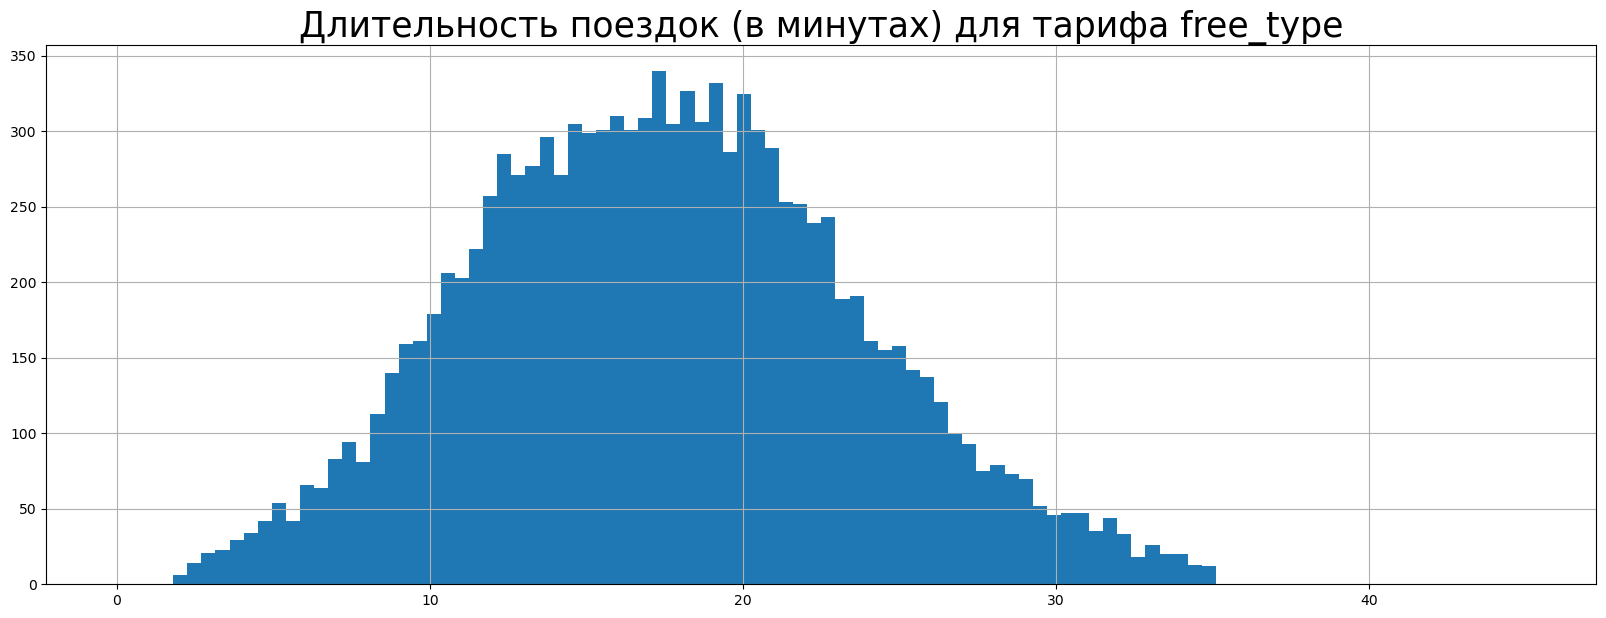

In [54]:
#duration free_type
free_type['duration'].hist(bins = 100, figsize = (20, 7), range = (0, 45));
plt.title('Длительность поездок (в минутах) для тарифа free_type', fontsize= 25);

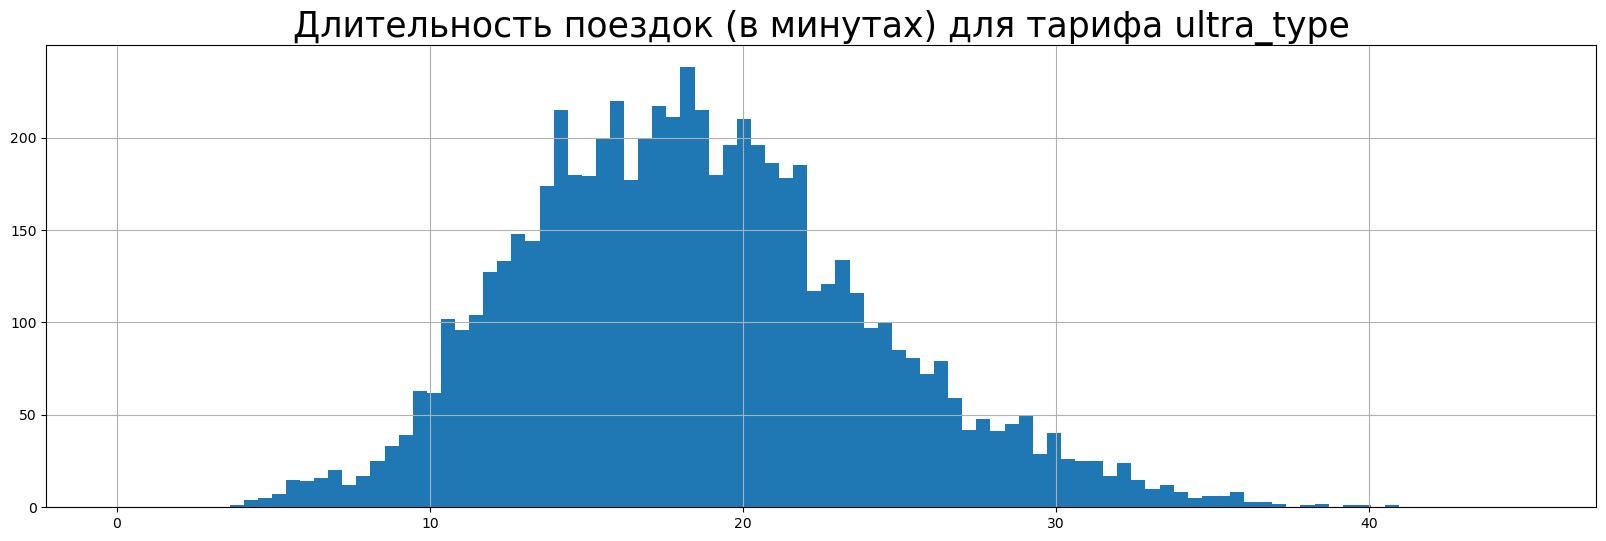

In [55]:
#duration ultra_type
ultra_type['duration'].hist(bins = 100, figsize = (20, 6), range = (0, 45));
plt.title('Длительность поездок (в минутах) для тарифа ultra_type', fontsize= 25);

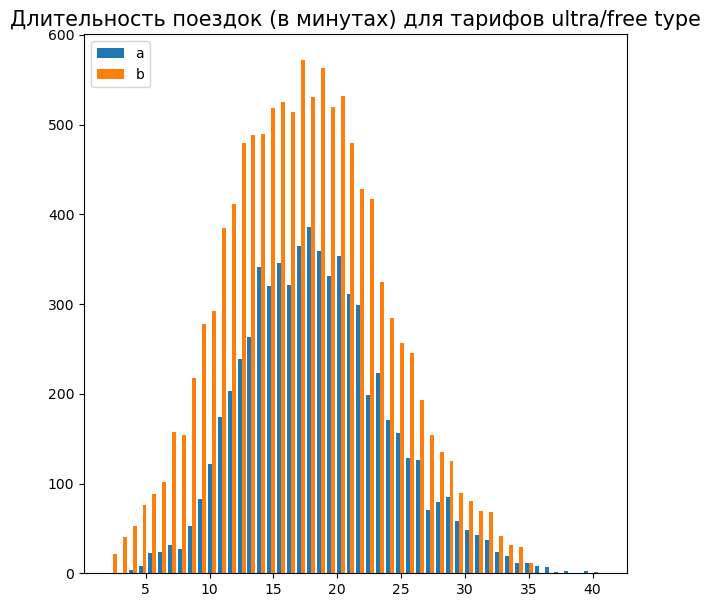

In [56]:
#Совместим графики распределений:
a = ultra_type['duration']
b = free_type['duration']

plt.hist([a, b], bins = 50, label=['a', 'b'])
plt.legend(loc='upper left')
plt.title('Длительность поездок (в минутах) для тарифов ultra/free type', fontsize= 15)
plt.show()


In [57]:
free_type['duration'].describe()

count    11473.000000
mean        17.530771
std          6.162609
min          2.035632
25%         13.085688
50%         17.383807
75%         21.638038
max         34.948498
Name: duration, dtype: float64

In [58]:
ultra_type['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

Наблюдаем на графиках нормальное распределение.
Можем визуально оценить, что в среднем, длительность поездок free_type гораздо выше, чем ultra_type.
Убедимся в этом, сравнив средние двух тарифов: mean(free_type)=17.4; mean(ultra_type)=18.5;

Шаг 4: Выводы

создали 3 датафрейма:
1)data - содержит объединенную информацию из трех дата-фреймов(пользователи, поездки, подписки)
2)free_type - содержит информацию о пользователях, не использующих подписку
3)ultra_type - содержит информацию о пользователях, оформивших подписку

Провели проверку корректности объединения датафреймов, в ходе которого выяснили, что количество строк и уникальных пользователей не изменилось. Это хороший знак. 

## Шаг 5. Подсчёт выручки

### Найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [59]:
#Округляем 
data['duration'] = np.ceil(data['duration']) 

In [60]:
#Создадим сводную таблицу, которая содержит необходимые данные:
data_pivot = data.pivot_table(index=['user_id', 'subscription_type', 'month'], 
                              values=['name', 'distance', 'duration'], 
                              aggfunc={'distance':'sum', 'duration':'sum', 'name':'count'})
#Переименуем новые столбцы:
data_pivot.columns = ['total_distance', 'total_duration', 'rides']
data_pivot = data_pivot.reset_index()
data_pivot.tail(5)

,user_id,subscription_type,month,total_distance,total_duration,rides
11295,1534,free,6,3409.468534,26.0,2
11296,1534,free,8,7622.453034,48.0,2
11297,1534,free,9,4928.173852,23.0,1
11298,1534,free,11,13350.015305,78.0,4
11299,1534,free,12,2371.711192,16.0,1


### Добавим столбец с помесячной выручкой, которую принёс каждый пользователь

In [61]:
#функция для подсчета помесячной выручки от каждого пользователя:
def revenue(row):
    if row['subscription_type'] == 'ultra':
        return 199+row['rides']*0+row['total_duration']*6
    if row['subscription_type'] == 'free':
        return row['rides']*50+row['total_duration']*8
data_pivot['revenue'] = data_pivot.apply(revenue, axis=1)

In [62]:
data_pivot.head(5)

,user_id,subscription_type,month,total_distance,total_duration,rides,revenue
0,1,ultra,1,7027.511294,42.0,2,451.0
1,1,ultra,4,754.159807,7.0,1,241.0
2,1,ultra,8,6723.470560,46.0,2,475.0
3,1,ultra,10,5809.911100,32.0,2,391.0
4,1,ultra,11,7003.499363,56.0,3,535.0


Шаг 5: Выводы

Мы создали датафрейм с агрегированными данными о поездках (расстояние, количество поездок, общее время поездок для каждого пользователя в каждом месяце) и на основе этих данных расcчитали помесячную выручку от каждого пользователя.

## Шаг 6. Проверка гипотез
Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

### Тратят ли пользователи с подпиской больше времени на поездки? 

Если да, то действительно ли пользователи с подпиской «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Сформулируем нулевую и альтернативную гипотезы о длительности поездок пользователей тарифов free и ultra:

H0: Длительность поездок пользователей тарифов free и ultra (без подписки/с подпиской, соответственно) не отличается

H1: Длительность поездок у пользователей тарифа ultra больше, чем у пользователей тарифа free

alpha = 0.05

In [63]:
alpha = 0.05
# вызов метода для проверки гипотезы:
results = st.ttest_ind(ultra_type['duration'], free_type['duration'], alternative = 'greater')
 
print('p-value:', results.pvalue)
 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу и принимаем альтернативную')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 4.704468074453899e-28
Отвергаем нулевую гипотезу и принимаем альтернативную


In [64]:
print('Средняя длительность поездки тарифа "free": {:.1f}'.format(free_type['duration'].mean()))
print('Средняя длительность поездки тарифа "ultra": {:.1f}'.format(ultra_type['duration'].mean()))

Средняя длительность поездки тарифа "free": 17.5
Средняя длительность поездки тарифа "ultra": 18.5


Действительно ли пользователи с подпиской «выгоднее» для компании?
Можем предположить, что пользователи с подпиской "выгоднее", т.к. средняя длительность поездки таких пользователей выше.
Исходя только из данных о средней длительности поездки мы не можем дать однозначный ответ на этот вопрос.
Для того, чтобы ответить на него, нам необходимо сравнить помесячные выручки от пользователей двух тарифов.
Поэтому ответ на этот вопрос будет дан в пункте 6.3.

**6.1 Вывод**

Средняя длительность поездки тарифа "ultra" больше средней длительности поездки тарифа "free".
p-value меньше зафиксированного уровня статистической значимости
На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть
нулевую гипотезу в пользу альтернативной.

###  Расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

Сформулируем нулевую и альтернативную гипотезы:

H0: Расстояние, которое проезжают пользователи с подпиской(ultra) за одну поездку больше или равно 3130 метров.

H1: Расстояние, которое проезжают пользователи с подпиской(ultra) за одну поездку меньше 3130 метрам.

In [65]:
alpha = 0.05
optimal_distance = 3130
# вызов метода для проверки гипотезы:
results = st.ttest_1samp(ultra_type['distance'], optimal_distance, alternative='less')

print('p-value:', results.pvalue)
 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу и принимаем альтернативную')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.08046311521502146
Не получилось отвергнуть нулевую гипотезу


In [66]:
#Сравним среднюю длительность поездки пользователей тарифов free и ultra:
print('Среднее расстояние за одну поездку тарифа "free": {:.1f}'.format(free_type['distance'].mean()))
print('Среднее расстояние за одну поездку тарифа "ultra": {:.1f}'.format(ultra_type['distance'].mean()))

Среднее расстояние за одну поездку тарифа "free": 3028.4
Среднее расстояние за одну поездку тарифа "ultra": 3115.4


Значение p-value=0.08 очень близко к пороговому значению уровня статистической значимости alpha=0.05, но оно все же выше и поэтому мы не можем отвергнуть нулевую гипотезу.
Однако, среднее расстояние за одну поездку 3115.4 < 3130.
То есть, если бы мы не расчитывали p-value, то можно было бы предположить, что среднее расстояние, которое пользователь преодолел за одну поездку, все же меньше 3130 метров.  
По итогу, нулевую гипотезу мы не отвергаем. Но считаем, что разница близка и нам необходимо больше данных, для того чтобы быть уверенными в выводе наверняка.

**6.2 Вывод** 

Среднее расстояние, которое проезжают пользователи с подпиской(ultra) за одну поездку больше или равно 3130 метрам. 
p-value = 0.08 больше зафиксированного уровня статистической значимости = 0.05
На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) нет оснований для отвержения
нулевой гипотезы в пользу альтернативной.

### Сравнение помесячных выручек от пользователей тарифов ultra и free

Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

Сформулируем нулевую и альтернативную гипотезы

H0: Помесячная выручка от пользователей с подпиской (тариф ultra) меньше или равна выручке от пользователей без подписки(тариф free)

H1: Помесячная выручка от пользователей с подпиской (тариф ultra) больше выручки, чем от пользователей без подписки(тариф free)

In [67]:
users_free = data_pivot.loc[data_pivot['subscription_type'] =='free']['revenue']
users_ultra = data_pivot.loc[data_pivot['subscription_type'] =='ultra']['revenue']

In [68]:
print('Средняя выручка тарифа "free": {:.1f}'.format(users_free.mean()))
print('Средняя выручка тарифа "ultra": {:.1f}'.format(users_ultra.mean()))
print('Полная выручка тарифа "free": {:.1f}'.format(users_free.sum()))
print('Полная выручка тарифа "ultra": {:.1f}'.format(users_ultra.sum()))

Средняя выручка тарифа "free": 329.3
Средняя выручка тарифа "ultra": 362.8
Полная выручка тарифа "free": 2228594.0
Полная выручка тарифа "ultra": 1644537.0


In [69]:
alpha = 0.05
# вызов метода для проверки гипотезы:
results = st.ttest_ind(users_ultra, users_free,  alternative='greater')
print('p-value:', results.pvalue)
 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу и принимаем альтернативную')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 2.0314113674863288e-30
Отвергаем нулевую гипотезу и принимаем альтернативную


**6.3 Вывод**

Средняя помесячная выручка от пользователей с подпиской (тариф ultra) больше средней помесячной выручки, пользователей без подписки(тариф free). 
p-value меньше зафиксированного уровня статистической значимости На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу в пользу альтернативной.
Тот же результат мы наблюдаем при сравнении средних помесячных выручек от пользователей различных тарифов: free=322.5, ultra=358.5

Ответим на вопрос **"Действительно ли пользователи с подпиской «выгоднее» для компании?"**
Да, основываясь на имеющихся данных, на уровне значимости 5% (уровне доверия 95%), у нас есть основания утверждать, что пользователи с подпиской выгоднее, чем пользователи без подписки.

### Вопрос

**Вопрос** 

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

**Ответ**

В данной гипотизе мы анализируем одну генеральную совокупность, с которой произошли изменения.
Для проверки гипотезы о равенстве средних двух генеральных совокупностей для зависимых (парных) выборок в Python, применяется метод scipy.stats.ttest_rel(). 
Метод принимает наборы данных до и после. Оба набора должны быть одинаковыми по размеру: каждое измерение должно быть проведено до и после изменения.

Шаг 6: Выводы
Мы проверили 3 гипотезы:
1)Тратят ли пользователи с подпиской больше времени на поездки?
 Средняя длительность поездки тарифа "ultra" больше средней длительности поездки тарифа "free".
 
2)Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? У нас не получилось отвергнуть нулевую гипотезу, которая гласит: "Среднее расстояние, которое проезжают пользователи с подпиской(ultra) за одну поездку больше или равно 3130 метрам."

3)Средняя помесячная выручка от пользователей с подпиской (тариф ultra) больше средней помесячной выручки, пользователей без подписки(тариф free).

4)Для проверки гипотезы об изменении количества обращений в техподдержку до и после обновления сервера нам понадобится метод scipy.stats.ttest_rel().


## Общие выводы:

В процессе анализа данных нами были пройдены следующие этапы:

Нами были получены данные сервиса аренды самокатов GoFast. Далее мы загрузили данные и ознакомились с ними(исследовали датафрейм на наличие пропусков, и некорректных типов данных);
В ходе предобработки данных преобразовали некорректный тип данных из object в datetime столбца ['date'] таблицы rides_go, создали столбец rides_go['month']; устранили пропуски и дубликаты данных.
В ходе проведенного исследовательского анализа данных нами были выявлены следующие закономерности: "Сервис наиболее популярен в Пятигорске, и наименее популярен Москве.", "Более половины исследованных пользователей предпочитают тариф ultra тарифу free.", "Половина всех клиентов относится к  возрастной категории от 22 до 28 лет.", "Основная масса пользователей предпочитает пользоваться самокатами в том случае, если им предстоит преодолеть путь протяженностью от 2,5 - 3,8 км и длительностью  от 13 до 21 минуты."

Далее была произведена подготовка данных, приведение их к удобному виду, для последующего проведения статистического анализа данных. На данном этапе были созданы 3 новых датафрейма: data(содержит объединенную информацию о пользователях, поездках, подписках); free_type (содержит информацию о пользователях, не использующих подписку); ultra_type (содержит информацию о пользователях, оформивших подписку. Провели проверку корректности объединения датафреймов, в ходе которого выяснили, что количество строк и уникальных пользователей не изменилось.Визуализировали информацию о расстоянии и времени поездок для пользователей обеих категорий. 

Этапу с проверкой гипотез предшествовал процесс агрегирования данных. Мы создали датафрейм pivot_table с агрегированными данными о поездках (расстояние, количество поездок, общее время поездок для каждого пользователя в каждом месяце) и на основе этих данных рассчитали помесячную выручку от каждого пользователя.

Заключение:
Мы проверили гипотезы, и выяснили, что основываясь на имеющихся данных, на уровне значимости 5% (уровне доверия 95%), у нас есть основания утверждать, что пользователи тарифа Ultra являются более выгодными для компании, в сравненнии c пользователями тарифа Ultra по следующим причинам: 

Подписка пользуется успехом среди клиентов сервиса: более половины исследованных пользователей предпочитают тариф Ultra

Средняя длительность поездки тарифа "ultra" больше средней длительности поездки тарифа "free". 
 
Средняя помесячная выручка от пользователей с подпиской (тариф ultra) больше средней помесячной выручки, пользователей без подписки(тариф free).

Вероятно, стоит задуматься о выделении бОльших средств на амортизацию самокатов, т.к. нами не была отвергнута следующая гипотеза: Среднее расстояние, которое проезжают пользователи с подпиской(ultra) за одну поездку больше или равно 3130 метрам.
Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Износ самоката пользователями тарифа ultra будет превышать оптимальное значение.